# Load Dataset

In [1]:
!gdown --id 16AGGO_SzhbLLIAKlyVD1DGxGhxhaNk2f

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=16AGGO_SzhbLLIAKlyVD1DGxGhxhaNk2f
From (redirected): https://drive.google.com/uc?id=16AGGO_SzhbLLIAKlyVD1DGxGhxhaNk2f&confirm=t&uuid=a3cc3172-9ebd-45d6-9abe-eeeb28de07e5
To: /content/archive.zip
100% 64.5M/64.5M [00:01<00:00, 34.9MB/s]


In [2]:
!gdown --id 1c2nbSdaJhzzHVXpQdO7r-g7rImSjVwpa

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1c2nbSdaJhzzHVXpQdO7r-g7rImSjVwpa
To: /content/SolaimanLipi.ttf
100% 280k/280k [00:00<00:00, 55.7MB/s]


In [3]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: Authentic-48K.csv       
  inflating: Fake-1K.csv             
  inflating: LabeledAuthentic-7K.csv  
  inflating: LabeledFake-1K.csv      


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
auth = pd.read_csv("/content/Authentic-48K.csv")
fake = pd.read_csv("/content/Fake-1K.csv")

In [6]:
auth.head()

,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1


In [7]:
fake.head()

,articleID,domain,date,category,headline,content,label
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0


# EDA

In [8]:
authentic_df = auth.copy()
fake_df = fake.copy()

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
nltk.download('punkt')

# Function to calculate the length of headlines and content
def calculate_lengths(df):
    df['headline_length'] = df['headline'].apply(lambda x: len(nltk.word_tokenize(x)))
    df['content_length'] = df['content'].apply(lambda x: len(nltk.word_tokenize(x)))

# Function to get n-grams from text
def get_top_ngrams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Calculate headline and content length for both datasets
calculate_lengths(authentic_df)
calculate_lengths(fake_df)

# Prepare data for analysis
headline_lengths = {
    'Authentic': authentic_df['headline_length'],
    'Fake': fake_df['headline_length']
}

content_lengths = {
    'Authentic': authentic_df['content_length'],
    'Fake': fake_df['content_length']
}

# Extract bigrams and trigrams from headlines and content
top_bigrams_authentic = get_top_ngrams(authentic_df['headline'], n=10, ngram_range=(2, 2))
top_trigrams_authentic = get_top_ngrams(authentic_df['headline'], n=10, ngram_range=(3, 3))

top_bigrams_fake = get_top_ngrams(fake_df['headline'], n=10, ngram_range=(2, 2))
top_trigrams_fake = get_top_ngrams(fake_df['headline'], n=10, ngram_range=(3, 3))

# Plotting the histogram for headline lengths
plt.figure(figsize=(12, 6))
sns.histplot(headline_lengths['Authentic'], label='Authentic Headlines', color='blue', kde=True)
sns.histplot(headline_lengths['Fake'], label='Fake Headlines', color='red', kde=True)
plt.title('Headline Length Comparison (Authentic vs Fake)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plotting the histogram for content lengths
plt.figure(figsize=(12, 6))
sns.histplot(content_lengths['Authentic'], label='Authentic Content', color='blue', kde=True)
sns.histplot(content_lengths['Fake'], label='Fake Content', color='red', kde=True)
plt.title('Content Length Comparison (Authentic vs Fake)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Displaying the top 10 bigrams and trigrams for both authentic and fake headlines
top_bigrams_authentic, top_trigrams_authentic, top_bigrams_fake, top_trigrams_fake


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


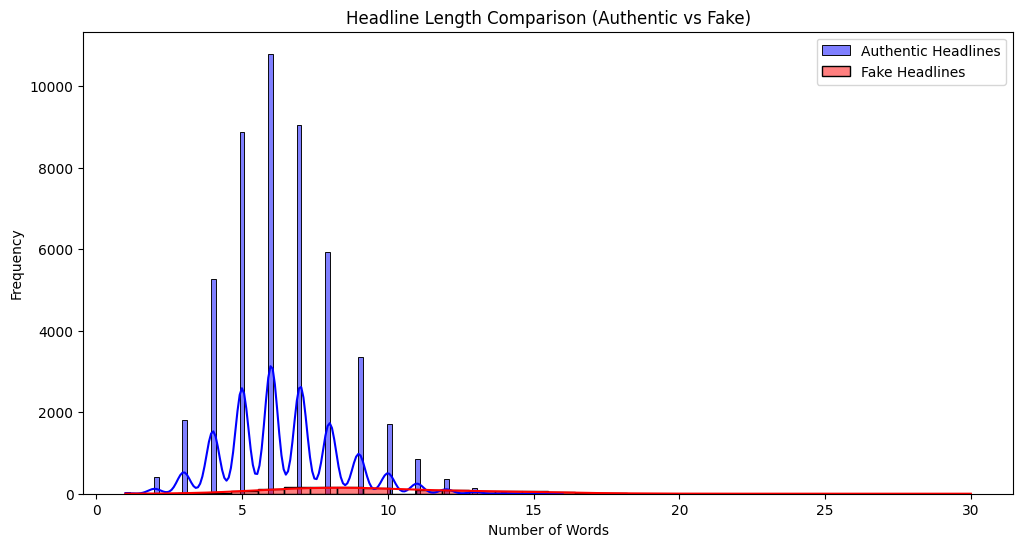

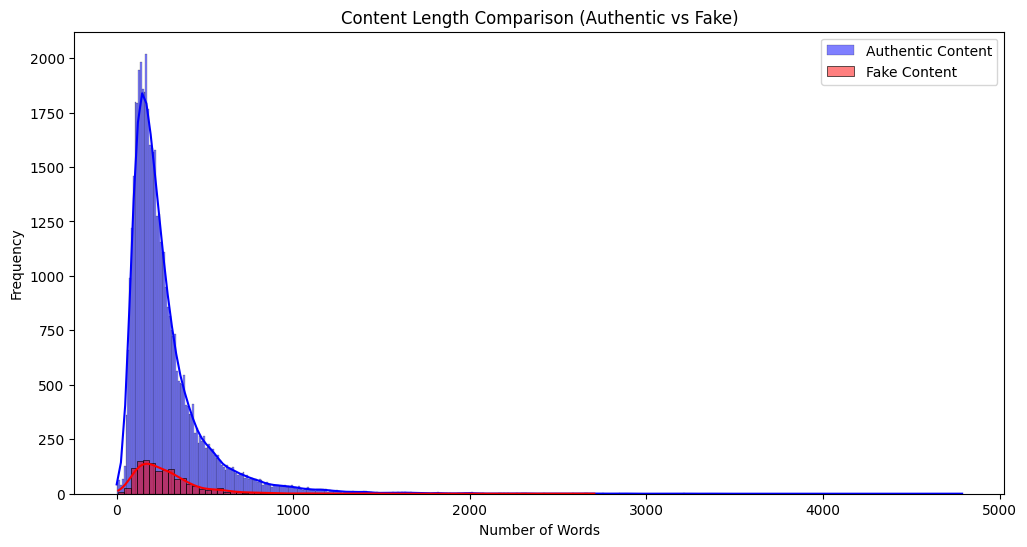

([('বর ২০১৮', 2366),
  ('অক বর', 1728),
  ('রধ নমন', 1215),
  ('উন নয়ন', 544),
  ('চট টগ', 456),
  ('ধর ষণ', 360),
  ('পত আইন', 297),
  ('বঙ গবন', 273),
  ('সড়ক ঘটন', 272),
  ('বর তন', 264)],
 [('অক বর ২০১৮', 1153),
  ('বর ২০১৮ ১৫', 197),
  ('বর ২০১৮ ১৮', 183),
  ('বর ২০১৮ ১৭', 179),
  ('পর বর তন', 173),
  ('বর ২০১৮ ২০', 170),
  ('বর ২০১৮ ১৯', 160),
  ('বর ২০১৮ ১৬', 154),
  ('বর ২০১৮ ২১', 149),
  ('১০ অক বর', 147)],
 [('মত কণ', 192),
  ('bengal beats', 181),
  ('সম পর', 19),
  ('রধ নমন', 18),
  ('উত তর', 15),
  ('মন নয়ন', 13),
  ('এক bengal', 12),
  ('বন কর', 12),
  ('কর bengal', 12),
  ('অনল ইন', 11)],
 [('এক bengal beats', 12),
  ('কর bengal beats', 12),
  ('বলছ গব ষণ', 7),
  ('নগর মত কণ', 7),
  ('ফখর মত কণ', 6),
  ('জন bengal beats', 6),
  ('মত মত কণ', 6),
  ('ফখ মত কণ', 5),
  ('ইউন মত কণ', 5),
  ('উত তর নল', 5)])

In [10]:
# Alternative method to calculate word count without using NLTK
def calculate_word_count(text):
    return len(text.split())

# Calculate headline and content length using the alternative method
authentic_df['headline_length'] = authentic_df['headline'].apply(calculate_word_count)
authentic_df['content_length'] = authentic_df['content'].apply(calculate_word_count)

fake_df['headline_length'] = fake_df['headline'].apply(calculate_word_count)
fake_df['content_length'] = fake_df['content'].apply(calculate_word_count)

# Plotting the histogram for headline lengths
plt.figure(figsize=(12, 6))
sns.histplot(authentic_df['headline_length'], label='Authentic Headlines', color='blue', kde=True)
sns.histplot(fake_df['headline_length'], label='Fake Headlines', color='red', kde=True)
plt.title('Headline Length Comparison (Authentic vs Fake)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plotting the histogram for content lengths
plt.figure(figsize=(12, 6))
sns.histplot(authentic_df['content_length'], label='Authentic Content', color='blue', kde=True)
sns.histplot(fake_df['content_length'], label='Fake Content', color='red', kde=True)
plt.title('Content Length Comparison (Authentic vs Fake)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Now, let's extract and display the bigrams and trigrams from the headlines of both datasets
top_bigrams_authentic = get_top_ngrams(authentic_df['headline'], n=10, ngram_range=(2, 2))
top_trigrams_authentic = get_top_ngrams(authentic_df['headline'], n=10, ngram_range=(3, 3))

top_bigrams_fake = get_top_ngrams(fake_df['headline'], n=10, ngram_range=(2, 2))
top_trigrams_fake = get_top_ngrams(fake_df['headline'], n=10, ngram_range=(3, 3))

top_bigrams_authentic, top_trigrams_authentic, top_bigrams_fake, top_trigrams_fake


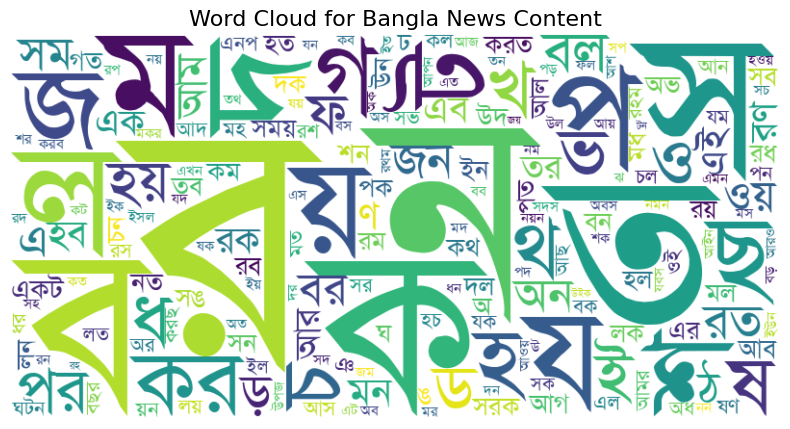

In [11]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Since the dataset is in Bangla, we will regenerate the word cloud for the Bangla content
authentic_df = auth.copy()
fake_df = fake.copy()
# Combine the content from both datasets for the word cloud
combined_content_bangla = ' '.join(authentic_df['content'].astype(str)) + ' ' + ' '.join(fake_df['content'].astype(str))

# Assuming the font is located at '/path/to/BanglaFont.ttf'
wordcloud_bangla = WordCloud(width=800, height=400, background_color='white',
                             collocations=False, font_path='/content/SolaimanLipi.ttf').generate(combined_content_bangla)

# Plotting the word cloud for Bangla content
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bangla, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Bangla News Content", fontsize=16)
plt.show()

# Classify News

In [12]:
import time
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from tqdm.notebook import tqdm
from transformers import BertModel, BertTokenizer, BertForSequenceClassification

# Prepare Datasets
- Dataset Info: Datasets contain `48678` authentic news and `1299` fake news. For this experiment, instead of all authentic news, only 5 times of fake news was used.
- And only consider the first 100 words (including headline and content)

- On datasets: Both headline and content of news were used. And manually a separator was added also `[SEP]`.

> BERT model is designed in such a way that the sentence has to start with the [CLS] token and end with the [SEP] token.
If we want to make separation of two sentences we can use [SEP] between sentences

### Train and Test split:
(only 20% data used for testing)
- Total Dataset size: 10392
- Total train size: 8313
- Test train size: 2079

In [13]:
class NewsDatasets(Dataset):
    def __init__(self, data, max_length=100):
        self.data = data

        self.config = {
            "max_length": max_length,
            "padding": "max_length",
            "return_tensors": "pt",
            "truncation": True,
            "add_special_tokens": True
        }

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        value = self.data.iloc[idx]
        return value['head']+"[SEP]"+value['con'] , value['label']

In [14]:
auth = pd.read_csv("/content/Authentic-48K.csv")
fake = pd.read_csv("/content/LabeledFake-1K.csv")

df = auth[:fake.shape[0]* 7]
df = pd.concat([df, fake]) # Use pd.concat to combine DataFrames
df = df.sample(frac=1).reset_index(drop=True)
len(df)

10392

In [15]:
import re

# Comprehensive list of Bangla stopwords
stopwords = {
    'অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আছে', 'আত্মা', 'আদ্যভাগে',
    'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উক্ত', 'উনি',
    'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একে', 'একটি', 'একবার', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা',
    'এটাই', 'এটি', 'এত', 'এতটাই', 'এদের', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওদের',
    'ওর', 'ওরা', 'কত', 'কবে', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করানো', 'করায়', 'করি', 'করিয়া', 'করিয়ে',
    'করেছে', 'করেছেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কী', 'কে', 'কেউ',
    'কেউই', 'কেন', 'কখনও', 'কত', 'কয়েক', 'কয়েকটি', 'ক্ষেত্রে', 'খুব', 'গিয়ে', 'গিয়েছে', 'গিয়েছিল', 'গেছে', 'চলে',
    'চান', 'চেয়ে', 'ছাড়া', 'ছাড়াও', 'ছিল', 'ছিলেন', 'জন্য', 'জন্যে', 'জানতে', 'জানায়', 'জানানো', 'জানিয়ে', 'জানি',
    'জানিয়ে', 'তখন', 'তবে', 'তবু', 'তাহলে', 'তাহার', 'তাদের', 'তার', 'তারপর', 'তারা', 'তাহা', 'তাকে', 'তাহাতে', 'তুমি',
    'তুলে', 'থাকে', 'থাকেন', 'থাকায়', 'থেকে', 'থেকেই', 'থেকেছে', 'থেকে', 'দিই', 'দিয়ে', 'দিয়ে', 'দেন', 'দেখা', 'দেখে',
    'দেয়', 'দেওয়া', 'দেওয়া হয়', 'দেওয়ার', 'ধরা', 'ধরে', 'নয়', 'নাকি', 'নাগাদ', 'নানা', 'নিয়ে', 'নিজে', 'নিজেই',
    'নিজেদের', 'নিজের', 'নতুন', 'নির্বাচিত', 'নীচের', 'নেকি', 'পক্ষে', 'পর', 'পরে', 'পরেই', 'পর্যন্ত', 'পাওয়া', 'পাচ্ছে',
    'পারি', 'পারি না', 'পারে', 'পূর্ব', 'প্রতি', 'প্রথম', 'প্রভৃতি', 'প্রযন্ত', 'প্রায়', 'ফের', 'বহু', 'বলা', 'বলতে',
    'বলল', 'বললেন', 'বলে', 'বলেই', 'বলেছেন', 'বলছিল', 'বলছেন', 'বসে', 'বহু', 'বসে', 'বহুমান', 'ভাবে', 'ভাবেই', 'মধ্য',
    'মধ্যেও', 'মধ্যে', 'মাত্র', 'মনে', 'মত', 'মতো', 'যখন', 'যদি', 'যদিও', 'যা', 'যাকে', 'যাচ্ছে', 'যাতে', 'যেন', 'যে',
    'যেতে', 'যায়', 'যারা', 'যাকে', 'যে', 'যেখানে', 'যেতে', 'যথেষ্ট', 'যদি', 'যা', 'রাখা', 'রাখার', 'রেখে', 'শুধু',
    'শুরু', 'সঙ্গে', 'সঙ্গেও', 'সমস্ত', 'সম্প্রতি', 'সহ', 'সহিত', 'সাধারণ', 'সুতরাং', 'সে', 'সেই', 'সেখান', 'সেখানে',
    'স্বয়ং', 'হইতে', 'হইবে', 'হইয়া', 'হওয়া', 'হওয়ার', 'হচ্ছে', 'হচ্ছি', 'হবেন', 'হয়ে', 'হয়েছে', 'হয়েছেন', 'হয়তো',
    'হল', 'হলে', 'হলেই', 'হলো'
}

# Punctuations and digits in Bangla
punctuations = r"[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~।]"
digits = r"\d+"
letters = r"[a-zA-Z]"

def tokenize(text):
    # Splitting the text by spaces
    return text.split()

def clean_text(text):
    # Tokenize the text
    tokens = tokenize(text)

    # Filter the tokens
    filtered = []
    for token in tokens:
        if token in stopwords:
            continue

        # Remove punctuations and digits from tokens
        token_clean = re.sub(punctuations, "", token)
        token_clean = re.sub(digits, "", token_clean)
        token_clean = re.sub(letters, "", token_clean)

        if token_clean:  # Only append if the token is not empty after cleaning
            filtered.append(token_clean)

    return " ".join(filtered)

print("********** Before ***************")
text = df.iloc[1]['content']
print(text)
print("\n********** After ***************")
print(clean_text(text))


********** Before ***************
যশোর প্রতিনিধি: ইউএসএআইডি’র মিশন পরিচালক ডেররিক ব্রাউনের নেতৃত্বে একটি প্রতিনিধি দল যশোর সদর উপজেলার শাহবাজপুরের ‘শুদ্ধ প্রকল্প’ পরিদর্শন করেছেন। ‘শুদ্ধ প্রকল্প’ হচ্ছে, জিএপির (গুড এগ্রিকালচার প্রাকটিসেস) মাধ্যমে সবজি চাষের পদ্ধতি। এরই বাস্তব প্রয়োগ চলছে যশোরের শাহবাজপুর গ্রামে। পরিদর্শনকালে এই প্রক্রিয়ায় চাষাবাদের স্বাস্থ্যগত বিষয়গুলো সম্পর্কে কৃষকদের সঙ্গে মতবিনিময় করেন তারা। শ্রদ্ধ ব্র্যান্ডের ফসল ও সবজির চাহিদা বৃদ্ধি পাওয়ায় স্থানীয় কৃষকদের মধ্যে যে অর্থনৈতিক অবস্থার পরিবর্তন সূচিত হয়েছে, সেজন্য প্রতিনিধি দল সাধুবাদ জানান। ইউএসএআইডির কর্মকর্তারা বৃহস্পতিবার সবজি ক্ষেত পরিদর্শন ও মতবিনিময়কালে স্থানীয় কৃষক, ‘স্বপ্ন’ কর্মকর্তারাও উপস্থিত ছিলেন। জানা যায়, ‘স্বপ্ন-ইউএসএআইডি’র এভিসি প্রকল্পের সহায়তায় ২০১৭ সাল থেকে যশোরে কৃষককে সবজি এবং ফসল ফলনে স্থানীয় জিএপি (গুড এগ্রিকালচার প্রাকটিসেস) স্ট্যান্ডার্ড অনুসরণ করে চাষ করতে প্রশিক্ষণ দিচ্ছে। এই উদ্যোগের অংশ হিসেবে ‘স্বপ্ন’ কৃষকের উৎপাদিত এই নিরাপদ ফল ও সবজি তাদের রিটেইল শপে ‘শুদ্ধ’ নামে বিক্রির ব্যবস্থা করেছ

In [16]:
df['head'] = df.headline.apply(clean_text)
df['con'] = df.content.apply(clean_text)

In [17]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=121, stratify=df['label'])

In [18]:
len(train_df), len(test_df)

(8313, 2079)

In [19]:
training_data = NewsDatasets(train_df)
train_dataloader = DataLoader(training_data, batch_size=16, shuffle=True)

In [20]:
test_data = NewsDatasets(test_df)
test_dataloader = DataLoader(test_data, batch_size=16, shuffle=True)

 # Define Model
 `Bert` stands for Bidirectional Encoder Representations from Transformers used in this experiment with two additional `Fully Connected` Layers.

 For this experiment, [Bangla Bert](https://huggingface.co/sagorsarker/bangla-bert-base) pretrained model was used.

#### FC layers
- First Linear Layer: IO(768 -> 128)
- Second Linear Layer: IO(128 -> 2)

#### Additionals
- Activation Fuction: Relu
- Dropout: 20%
- Optimizer: AdamW
- Loss: CrossEntropyLoss
- Scheduler: StepLR

In [21]:
class NewsBert(nn.Module):

    def __init__(self, bert):
        super(NewsBert, self).__init__()

        self.bert = bert

        # dropout layer
        self.dropout = nn.Dropout(0.2)

        # relu activation function
        self.relu = nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768, 128)

        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(128, 2)

    # define the forward pass
    def forward(self, input_ids, token_type_ids, attention_mask):
        # pass the inputs to the model
        out = self.bert(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)

        x = self.fc1(out[1])
        x = self.relu(x)
        # output layer
        x = self.fc2(self.dropout(x))

        return x

In [22]:
bert_model_name = "sagorsarker/bangla-bert-base"
bert = BertModel.from_pretrained(bert_model_name)
tokenizer = BertTokenizer.from_pretrained(bert_model_name)

config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/660M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NewsBert(bert)
model.to(device);

In [24]:
s = "আমি বাংলায় গান গাই। [SEP]"
t = tokenizer.encode_plus(s, return_tensors="pt").to(device)
print(t)
out = model(**t)
print(out)

{'input_ids': tensor([[  101,  2169,  2492,  9294,  2552, 13985,  1014,   102,   102]],
       device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
tensor([[0.0200, 0.1915]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [25]:
from torch.optim.lr_scheduler import StepLR

optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=2, gamma=0.1)

In [26]:
def train(model, dataloader, optimizer, criterion, config):
    model.train()  # prep model for training
    train_loss = 0
    for batch in tqdm(dataloader):
        text, labels = batch

        model.zero_grad()

        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        # move things to model
        logs = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss = criterion(logs, labels)
        train_loss += loss.item() * input_ids.size(0)
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    return train_loss

In [27]:
def evaluate(model, dataloader, criterion, config):
    total = 0
    correct = 0
    valid_loss = 0.0

    model.eval()  # prep model for evaluation
    for batch in dataloader:
        text, labels = batch
        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        # move things to model
        output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss_p = criterion(output, labels)
        # update running validation loss
        valid_loss += loss_p.item() * input_ids.size(0)
        # calculate accuracy
        proba = torch.exp(output)
        top_p, top_class = proba.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        # accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    return total, correct, valid_loss

In [28]:
epochs = 5
tokenizer_config = {
    "max_length": 100,
    "padding": "max_length",
    "return_tensors": "pt",
    "truncation": True,
    "add_special_tokens": True
}

In [29]:
train_loss_data, valid_loss_data = [], []
valid_loss_min = np.Inf
since = time.time()
best_loss = np.inf

for epoch in range(epochs):
    print("Epoch: {}/{}".format(epoch + 1, epochs))
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    total = 0
    correct = 0
    e_since = time.time()

    # Train Model
    train_loss += train(model, train_dataloader, optimizer, criterion, tokenizer_config)
    # Now Evaluate
    out = evaluate(model, test_dataloader, criterion, tokenizer_config)
    total += out[0]
    correct += out[1]
    valid_loss += out[2]

    scheduler.step()

    # print training/validation statistics
    # calculate average loss over an epoch
    train_loss = train_loss / len(train_dataloader.dataset)
    valid_loss = valid_loss / len(test_dataloader.dataset)

    # calculate train loss and running loss
    train_loss_data.append(train_loss * 100)
    valid_loss_data.append(valid_loss * 100)

    if valid_loss < best_loss:
        best_loss = valid_loss
        torch.save(model.state_dict(), "news_model1.pth")

    print("\tTrain loss:{:.6f}..".format(train_loss),
          "\tValid Loss:{:.6f}..".format(valid_loss),
          "\tAccuracy: {:.4f}".format(correct / total * 100))

time_elapsed = time.time() - since
print('Training completed in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

Epoch: 1/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.239361.. 	Valid Loss:0.167792.. 	Accuracy: 94.8533
Epoch: 2/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.145740.. 	Valid Loss:0.147535.. 	Accuracy: 95.2381
Epoch: 3/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.075350.. 	Valid Loss:0.182542.. 	Accuracy: 95.8153
Epoch: 4/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.063437.. 	Valid Loss:0.185007.. 	Accuracy: 96.0077
Epoch: 5/5


  0%|          | 0/520 [00:00<?, ?it/s]

	Train loss:0.053941.. 	Valid Loss:0.190028.. 	Accuracy: 95.9596
Training completed in 16m 19s


# Testing
To test this model, the left 15% data was used.

In [30]:
model.load_state_dict(torch.load("/content/news_model1.pth", map_location = device))

<All keys matched successfully>

In [31]:
all_preds = []
all_labels = []

for batch in test_dataloader:
    text, labels = batch
    inputs = tokenizer.batch_encode_plus(
        text, **tokenizer_config
    )
    input_ids = inputs['input_ids'].to(device)
    token_type_ids = inputs['token_type_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    labels = labels.to(device)

    # move things to model
    output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)
    preds = output.detach().cpu().numpy()
    preds = np.argmax(preds, axis = 1)
    all_preds.extend(preds)
    all_labels.extend(labels.cpu().numpy())

In [32]:
from sklearn.metrics import classification_report

# preds = np.argmax(preds, axis = 1)
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       260
           1       0.97      0.97      0.97      1819

    accuracy                           0.95      2079
   macro avg       0.89      0.89      0.89      2079
weighted avg       0.95      0.95      0.95      2079



# XAI Module With SHAP

In [43]:
import shap
import torch
from transformers import BertTokenizer

# Ensure the model is in evaluation mode
model.eval()

# Define a wrapper function for the model
def predict_proba(texts):
    """
    Wrapper for predicting probabilities for a list of texts using the model.
    Args:
    - texts (list of str): List of input texts.

    Returns:
    - np.array: Predicted probabilities for each class.
    """
    inputs = tokenizer.batch_encode_plus(
        texts,
        max_length=100,
        truncation=True,
        padding="max_length",
        return_tensors="pt"
    )
    input_ids = inputs["input_ids"].to(device)
    attention_mask = inputs["attention_mask"].to(device)
    token_type_ids = inputs.get("token_type_ids", None)
    if token_type_ids is not None:
        token_type_ids = token_type_ids.to(device)

    # Perform model inference
    with torch.no_grad():
        output = model(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        logits = output.logits  # Extract logits from the SequenceClassifierOutput
        probabilities = torch.softmax(logits, dim=1).cpu().numpy()
    return probabilities

# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained("sagorsarker/bangla-bert-base")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Initialize SHAP explainer with background data
background_texts = [
    "বাংলাদেশ একটি স্বাধীন দেশ।",
    "শিক্ষা জাতির মেরুদণ্ড।"
]
background = tokenizer.batch_encode_plus(
    background_texts,
    max_length=100,
    truncation=True,
    padding="max_length",
    return_tensors="pt"
)
background_input_ids = background["input_ids"].to(device)
background_attention_mask = background["attention_mask"].to(device)

# Initialize SHAP explainer
explainer = shap.Explainer(
    predict_proba,
    masker=shap.maskers.Text(tokenizer),
)

# Texts to explain
texts_to_explain = [
    "বাংলাদেশের ইতিহাস একটি দীর্ঘ ও গৌরবময়।",
    "ভুয়া সংবাদ অনেক সময় মানুষকে বিভ্রান্ত করে।"
]

# Explain the predictions
shap_values = explainer(texts_to_explain)

# Visualize the explanations
shap.plots.text(shap_values[0])  # Visualization for the first text


# XAI with LIME

In [45]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=be1443e7252a0647c5a4e7bda2f4e82844bc8c4c612d686de51dadade6c82f3b
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [47]:
from lime.lime_text import LimeTextExplainer
from transformers import BertTokenizer
import numpy as np

# Ensure the model is in evaluation mode
model.eval()

# Prediction function for LIME (using CPU to save GPU memory)
def predict_proba_lime(texts):
    model.cpu()  # Move the model to CPU for inference
    inputs = tokenizer.batch_encode_plus(
        texts,
        max_length=50,  # Reduce max_length for memory efficiency
        truncation=True,
        padding="max_length",
        return_tensors="pt"
    )
    input_ids = inputs["input_ids"]
    attention_mask = inputs["attention_mask"]
    token_type_ids = inputs.get("token_type_ids", None)

    with torch.no_grad():
        output = model(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        logits = output.logits.numpy()
        probabilities = np.exp(logits) / np.exp(logits).sum(axis=1, keepdims=True)  # Softmax for probabilities

    model.to(device)  # Move the model back to GPU for other tasks
    return probabilities

# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained("sagorsarker/bangla-bert-base")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Initialize LIME Text Explainer
explainer = LimeTextExplainer(class_names=["Fake News", "Authentic News"])

# Sample text to explain
sample_text = "বাংলাদেশের ইতিহাস একটি দীর্ঘ ও গৌরবময়।"

# Generate explanation with optimizations
exp = explainer.explain_instance(
    sample_text[:200],  # Truncate input to 200 characters
    predict_proba_lime,
    num_features=10,
    top_labels=2,
    num_samples=500  # Reduce the number of perturbations
)

# Visualize the explanation
exp.show_in_notebook(text=True)
